### From Biological to Artificial Neurons

ANN (Artificial Neural Network) is inspired from the neurons found in our brains. The first architectural nn was based on how animal brains perform complex computations usign propositional logic. Today we have huge amount of data avaialble to train neural networks, which often outperform many other ML Techniques. The infrastructure is vastly improved, from powerful GPUs to cloud architectures, it's accessible to everyone. 

__Biological Neurons__

the biological neurons 
- composed of cell boy, containing the nucleus and most of the cell's complex components
- dendrites are the braching extensions
- axon is the very long extension
- at the extrmity of the axon splits into braches called the telodentria
- at the tip of these branches are minuscule structures called synaptic terminal which are connected to hte dendrites
- action potentials are the electrical impulses produced by axons
- synapes (or synaptic terminal) release the chemical called neurotransmitters

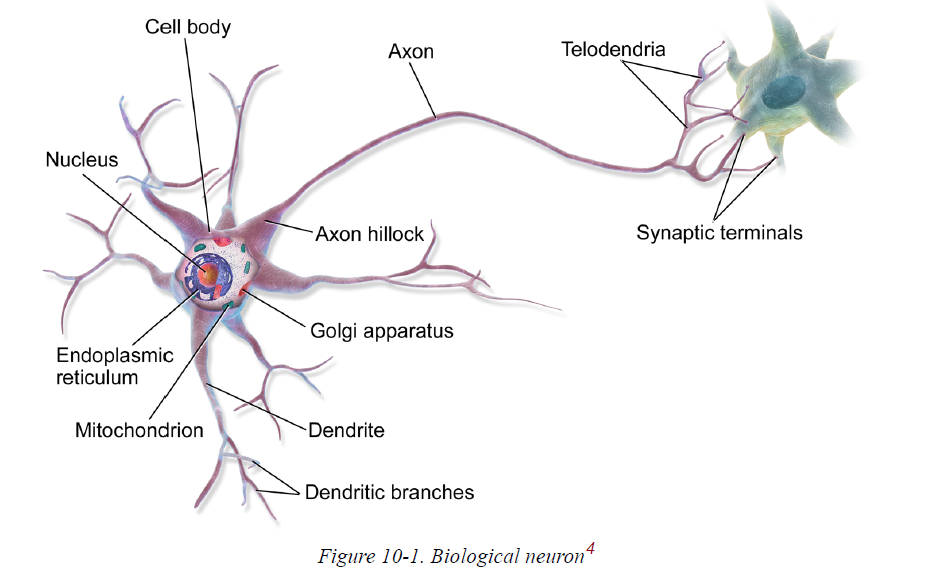

__Logical COmputations with Neurons__

First simple artificial neuron was binary output with multiple binary input. the AN activates when more than a certain number of inputs are active. this followed a logical flow of computation from inputs to outputs.

__Perceptron__

perceptron is one of the simplest ANN architecture (invented in 1957, by Frank Rosenblatt). It uses threshold logic unit (TLU), sometimes a linear threshold unit (LTU). The inputs and outputs are numbers (instead of binary) and each input conenction has a weight. the final input is the weighted sum of the inputs, which goes in the step function (most common - heaviside step function) and the output is the output of this step function. 

heaviside(z) = 0 if z< threshold else 1

A perceptron is composed of a single layer of TLUs with each TLU connected to all the inputs. 

- When all the neurons in the layer are connectec to the neurons in the previous layer, it's called fully connected layer (or dense layer)
- The inputs of the Perceptron are fed to special passthrough neurons called input neurons
- all the input neurons form the input layer
- an addtional bias term is add, called bias neuron

Computing the output of the fully connected layer

$h_{W,b}(X) = \phi (XW + b)$

- X is matrix of the input features
- W is matrix of the weights
- b is the bias vetor
- $\phi$ is the activation fuction

__Training a perceptron__

- Cells that file together, wire together (Hebb's rule / Hebbian Learning)
- Perceptrons are trained using a variant of this rule that takes into account the error made by the network when it makes a prediction
- the Perceptron learning rule reinforces connections that help reduce the error. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.

$w_{i,j}^{(next step)} = w_{i,j} + η(y_j − ˆy_j)x_i$


- x is the input value
- ^y is the output  value
- y is the actual value
- w is the weight between the two instances
- η is the learning rate

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

X = iris.data[:,(2,3)]
y = (iris.target ==0).astype(np.int)

In [3]:
per_clf = Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])

In [4]:
y_pred

array([0])

Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: 
- loss="perceptron", 
- learning_rate="constant",
- eta0=1 (the learning rate),
- penalty=None (no regularization).

Perceptron do not output a class probability, they make predictions based on hard threshold. 

__The Multilayer Perceptron and Backpropogation__

- An MLP is composed of one (passthrough) input layer,
- one or more layers of TLUs, called hidden layers, 
- and one final layer of TLUs called the output layer
- The layers close to the input layer are usually called the lower layers, 
- and the ones close to the outputs are usually called the upper layers. 
- Every layer except the output layer includes a bias neuron and is fully connected to the next layer.


Feedforward NN - when the flow is in one direction

Deep NN - when the ANN contains a deep stack of hidden layers.

__Backpropagation__

Backpropogation provides effecient calcuation of the weights in less numebr of passes. it can find out how each connection
weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

Working of backpropagation:

- handles mini batch at a time, and it goes through the full training set multiple times. Each time is called an _epoch_
- each mini batch is passed to the network's input layer, which sends it to the first hidden layer.
    - the algorithms then computes the output of all the neurons in this layer. 
    - The result is passed to the next layer, its output is computed an passed to the next latyer and so on 
    - until we get the output of the last layer
    - this is forward pass
- next the algorithm measures the netowrk's output error
- then it computes how much each output connection contributed to the error. it's done using _chain rule_
- then it measures how much of these error contributions came form each connection in the layer below, again using the chain rule
- finally, it performs the gradient descent step to tweak all the connection weights in the network, using the error gradients it just compared

In order for this algorithm to work properly, the step function is replaced with the logistic (sigmoid) function, σ(z) = 1 / (1 + exp(–z)). since step function contains only flat segments, so there is no gradient to work with while the logistic
function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step.

the algo works well with many other activation functions, not just the logistic function.

- hyperbolic tangent function tanh(z) = 2 $\sigma$ (2z) - 1
    - this is S-shaped
    - continous
    - differentiable
    - output value ranges from -1 to 1
    - the range tends to make each laer's output less centered around 0 at the beginning, speeding up the convergence
- rectified linear unit function ReLU(z) = max(0,z)
    - continuos
    - not differentiable at z =0 
    - derivative is 0 for z <0
    - in practce, it's faster to compute
    
Why do we need activation functions at all?

- if we chain linear transformations, the result is a linear transformation
- So if we don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and we can’t solve very complex problems with that. 
- Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.


### Regression MLPs

MLPs can perform regression, we need one output neuron for regression which is the predicted value. for multi-variate regression, we need one neuron per class. 

__Activation Function__

- In general, we avoid a activation function at the output for regression, so the output is not bound by activation function.
- If we want a positive output always, then we can use ReLU activation function or we can use a softplus activation function, which is smooth vairant of the ReLU: softplus(z) = log(1+ exp(z)). it's close to 0 when z is negative, and close to z when z is positive. 
- if we want output to be in a range of values, then we can use the logistic function or the hyperbolic tangent and then scale the labels to the appropiate range.

__Loss Function__

- The loss function to use during training is typically the mean squared error,
- but if there are lot of outliers in the training set, we can use the mean absolute error instead. 
- Alternatively, we can use the Huber loss, which is a combination of both. Huber loss is quadratic when the error is less than a threshold, and linear when the error is larger than threshold


### Classification MLPs

MLPs can be used for classification. For binary classification problem, we need a single output neuron which can output one number btw 0 and 1, as a probability of the positive class. It can handle multilabel classification as well. these will have one output neuron for each label, and the probabilities might not add to one, sice it belongs to diff class.  We an also have multiclass classification with one output neuron for each class and all probabilities adding to one. The loss fucntion is the cross-entroopy loss, since we are predicting te probability distributions. 

| Hyperparameter | Binary clas. | Multilabel clas. | Multiclass clas.|
| :-: | :-: | :-: | :-:|
| Input and Hidden Layers| same as regression | same as regression | same as regression|
| #output neurons | 1 | 1/label | 1/class |
| Output layer activation | Logistic | Logistic | Softmax |
| Loss Function | Cross-Entropy | Cross-Entropy | Cross-Entropy|

### Implementing MLPs with Keras

Keras is a high-level Deep Learning API that allows us to easily build, train, evaluate and execute all sorts of neural networks. 

- Documentation: https://keras.io/
- Open Source: https://github.com/keras-team/keras

At present, we can chose from thrww deep learning libraries for backend: tensorflow, microsoft cognitive toolkit, theano. (multibackend keras)

Now, tensorflow also comes as a bundle with keras, tf.keras, but it only supports tensorflow at the  backend. it can provide some importatant features like tensorflow's data api. 

Another deep learning python library is pytorch. the API is similar to keras, hence it's easier to learn after keras.

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.6.0'

In [7]:
keras.__version__

'2.6.0'

In [8]:
tf.keras.__version__

'2.6.0'

### Building an Image Classifier using the Sequential API


using the faashion mnist dataset from keras

In [9]:
from keras import datasets

In [10]:
fmnist = datasets.fashion_mnist

In [11]:
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

Each image is a 2D array, unlike the 1D array in scikit dataset load. The pixel intensity is integer from 0-255 instead of float. 

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train.dtype

dtype('uint8')

In [16]:
##Creating validation dataset and scaling the dataset

X_val, X_train = X_train[:5000],X_train[5000:]
y_val, y_train = y_train[:5000],y_train[5000:]

In [17]:
print(len(X_train),len(X_val),len(X_test))

55000 5000 10000


In [18]:
##Scaling

X_train, X_val, X_test = X_train/255.0, X_val/255.0,X_test/255.0

In [19]:
##labels from https://keras.io/api/datasets/fashion_mnist/#loaddata-function
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
##Vaiualizing one instance
y_train[0]

4

In [21]:
labels[4]

'Coat'

(-0.5, 27.5, 27.5, -0.5)

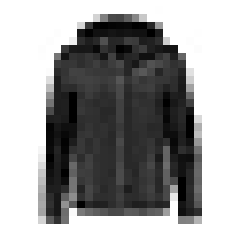

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

some_digit = X_train[0]
plt.imshow(some_digit,cmap ="binary")
plt.axis("off")

In [23]:
##Creating a model usign sequential API

model = keras.models.Sequential()

This creates a sequential model, it's the simplest keras models for neural network that are just composed of single stack of layers connected dequentially.

In [24]:
##Adding input layer
model.add(keras.layers.Flatten(input_shape = [28,28]))

This is the first layer for the model. It's a flatten layer whose role is to convert each input image into a 1D array. It computes X.reshape(-1,1) for X. There are not hyperparamters, it's only preprocessing step. 
we could have instead also used below ```keras.layers.InputLayer``` as first layer

In [25]:
##Adding second layer
model.add(keras.layers.Dense(300, activation = "relu"))

Next layer is a fully connected layer with 300 neurons with ReLU activation function. it manages it's own weight matrix, it also manages it's bias vector

In [26]:
##Adding second layer
model.add(keras.layers.Dense(100, activation = "relu"))

In [27]:
##Adding second layer
model.add(keras.layers.Dense(10, activation = "softmax"))

Next we add a hidden layer with 100 neurons. and then last layer is a dense layer withg 10 neurons and a softmax activation function, since the classes are exclusive.  Specifying activation="relu" is equivalent to specifying ```activation=keras.activations.relu```

In [28]:
##Instead of adding the layers one by one. we can do below

model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [29]:
model.summary() ##displays all the layers

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.layers

In [31]:
hidden1 = model.layers[1]

In [32]:
hidden1.name

'dense_3'

In [33]:
model.get_layer('dense_3') is hidden1

True

In [34]:
weights, biases = hidden1.get_weights()

In [35]:
weights

array([[-0.02477799,  0.04341962,  0.04701009, ...,  0.07221437,
         0.06872639,  0.06621282],
       [-0.07407495, -0.0666424 ,  0.0153779 , ..., -0.03611757,
        -0.05405717,  0.00523776],
       [-0.03908171,  0.00552543, -0.06444784, ...,  0.04254416,
         0.04599568, -0.03687372],
       ...,
       [-0.03219069, -0.07062575, -0.02708359, ..., -0.07146119,
         0.00301439, -0.07321571],
       [ 0.04635118, -0.00066631,  0.00161069, ...,  0.02245696,
         0.02094262,  0.0013655 ],
       [ 0.06705959, -0.05050221, -0.06578816, ..., -0.00793182,
         0.06717579, -0.01604861]], dtype=float32)

In [36]:
weights.shape

(784, 300)

In [37]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [38]:
biases.shape

(300,)

the Dense layer initialized the connection weights randomly, and the biases were initialized to zeros. 

### Compiling the model

After a model is created, you must call its ```compile()``` method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation

In [39]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

__Loss__

- We use the "sparse_categorical_crossentropy" loss because we have sparse labels and the classes are exclusive. 
- If instead we had one target probability per class for each instance, then we would need to use the "categorical_crossentropy" loss instead. 
- If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

__Optimizer__

- Regarding the optimizer, "sgd" means that we will train the model using simple Stochastic Gradient Descent. 
- In other words, Keras will perform the backpropagation algorithm described earlier

__Metrics__

- Since it's a classifer, we are usign accuracy

### Training and Evaluating the model

using fit()

In [40]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7049 - accuracy: 0.7680 - val_loss: 0.5285 - val_accuracy: 0.8160
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4837 - accuracy: 0.8321 - val_loss: 0.4337 - val_accuracy: 0.8552
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4382 - accuracy: 0.8475 - val_loss: 0.4038 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4095 - accuracy: 0.8568 - val_loss: 0.3916 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3900 - accuracy: 0.8622 - val_loss: 0.3981 - val_accuracy: 0.8596
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3749 - accuracy: 0.8664 - val_loss: 0.3649 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3603 - accuracy: 0.8720 - val_loss: 0.3809 - val_accuracy:

The neural network is trained. At each epoch during training, Keras displays the number of instances processed so far (along
with a progress bar), the mean training time per sample, and the loss and accuracy (or any other extra metrics you asked for) on both the training set and the validation set.

Instead of passing a validation set using the validation_data argument, we could set validation_split to the ratio of the training set that you want Keras to use for validation. For example, validation_split=0.1 tells Keras to use the last 10% of the data (before shuffling) for validation.

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the class_weight argument when calling the fit() method, which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss. If you need per-instance weights, set the sample_weight argument (it supersedes class_weight). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the validation_data tuple.

In [41]:
model.save('models/ch_10/keras_seq.h5')

In [42]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [43]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
history.history['loss']

[0.7049402594566345,
 0.4836750030517578,
 0.4381580352783203,
 0.40953850746154785,
 0.3899949789047241,
 0.3748793601989746,
 0.36027857661247253,
 0.34963735938072205,
 0.33808788657188416,
 0.3288154900074005,
 0.3201581537723541,
 0.3132689595222473,
 0.30527278780937195,
 0.29904747009277344,
 0.2915467917919159,
 0.28586214780807495,
 0.27986687421798706,
 0.2746863067150116,
 0.26993507146835327,
 0.26502731442451477,
 0.2599468231201172,
 0.25431033968925476,
 0.2506706118583679,
 0.24544046819210052,
 0.2422485202550888,
 0.2378271520137787,
 0.23389405012130737,
 0.22989220917224884,
 0.22668930888175964,
 0.22274263203144073]

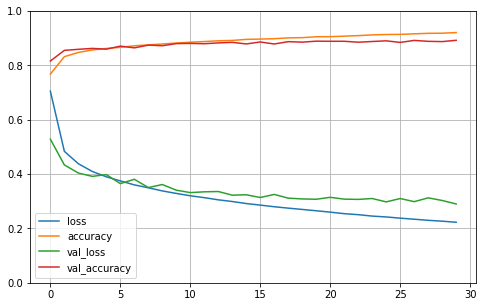

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. the validation error is calcualted after training error hence it has to be shifte by 0.5 epoch for plotting. Here, the training has not convergered since they completeyl overlap, and on convergence we epect the training error to outperform the validartion error. we can again call the fit() function and it starts training where it left off.

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3276 - accuracy: 0.8849


[0.32759949564933777, 0.8848999738693237]

#### Using model to make predictions

we can use ```predict()``` method to make prediction on new instances. 

In [48]:
X_new = X_test[:2]
y_proba = model.predict(X_new)
print(y_proba.round(2))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [49]:
y_test[:2]

array([9, 2], dtype=uint8)

```predict()``` shows the prediction probability for all classes. ```predict_classes()``` shows the probabilities only for the relevant clases. (This is removed for the latest version of the tensorflow i.e. the one use here, hecne we can use np.argmax(y_proba,axis=1))

In [50]:
y_pred = np.argmax(y_proba,axis=1)
print(y_pred)

[9 2]


In [51]:
np.array(labels)[y_pred]

array(['Ankle boot', 'Pullover'], dtype='<U11')

In [52]:
def plot_fmnist(some_digit):
    plt.imshow(some_digit,cmap ="binary")
    plt.axis("off")
    plt.show()

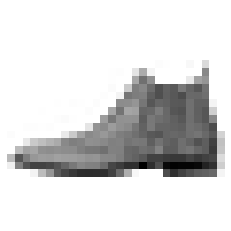

In [53]:
plot_fmnist(X_test[0])

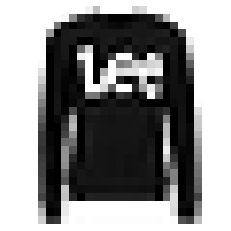

In [54]:
plot_fmnist(X_test[1])

### Building a Regression MLP usign Sequential API

using scikit learn dataset to get the data

In [55]:
from sklearn.datasets import fetch_california_housing as fch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
housing = fch()
X = housing.data
y = housing.target

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [60]:
from joblib import dump
dump(scaler,'models/ch_10/housing_scaler.pkl')

['models/ch_10/housing_scaler.pkl']

In [61]:
##We can add same layer as earlier, since it's a regression task we need only one neuron in outer layer

model = keras.models.Sequential([
        keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

In [62]:
model.compile(loss = "mean_squared_error", optimizer = "sgd")

In [63]:
history_housing = model.fit(X_train, y_train, epochs = 25, validation_data = (X_val, y_val)) 

Epoch 1/25
363/363 [==============================] - 1s 3ms/step - loss: 1.0088 - val_loss: 0.6872
Epoch 2/25
363/363 [==============================] - 1s 2ms/step - loss: 0.5159 - val_loss: 0.4455
Epoch 3/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4730 - val_loss: 0.4466
Epoch 4/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4527 - val_loss: 0.4216
Epoch 5/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4373 - val_loss: 0.4096
Epoch 6/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4314 - val_loss: 0.4126
Epoch 7/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4192 - val_loss: 0.3982
Epoch 8/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4143 - val_loss: 0.3940
Epoch 9/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4075 - val_loss: 0.3926
Epoch 10/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4070 - val_loss: 0.4056

In [64]:
model.save('models/ch_10/housing_keras.h5')

In [65]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3760


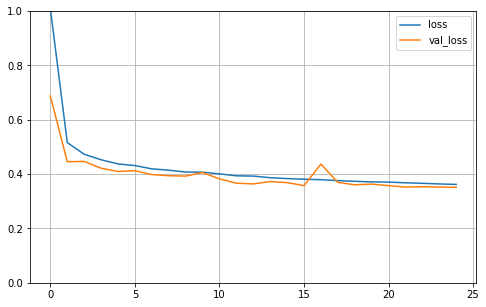

In [66]:
pd.DataFrame(history_housing.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [67]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred, y_test[:3])

[[0.95050555]
 [1.783365  ]
 [2.3591685 ]] [1.    1.253 1.776]


### Building Complex Models using the functional API

One example of non sequential NN is a wide and deep NN. it connects all or part of the inputs directly to the output layer. it makes it possible for the NN to learn both deep patterns and simple rules. in contrast, the regular MLP forces all the data to flow throug the same full stack of the laters. 

building model iwth function api for california housing data

In [68]:
input_ = keras.layers.Input(shape = X_train.shape[1:])

This specifies the input the model with get, we can have multiple inputs.

In [69]:
from keras.layers import Dense, Concatenate, Input

In [70]:
hidden1 = Dense(30, activation = "relu")(input_)

this hidden1 layers is connected with input layer as spefied in the end

In [71]:
hidden2 = Dense(30, activation = "relu")(hidden1)

second hidden layer is connected with the 1st hidden layer, i.e. it takes input from hidden1

In [72]:
concat = Concatenate()([input_,hidden2])

here we are concatenating the output of the input and hidden2 layer, we will input this in the final layer.

In [73]:
output = Dense(1)(concat)

In [74]:
model = keras.Model(inputs = [input_], outputs = [output])

the final model is created

In [75]:
def train_evaluate_regression(model,model_name, p_loss = "mean_squared_error", p_optimizer = "sgd",epc = 25):
    model.compile(loss = p_loss, optimizer = p_optimizer)
    print('Training')
    history = model.fit(X_train, y_train, epochs = epc, validation_data = (X_val, y_val)) 
    print('Plotting loss')
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.show()
    print('Savign the model')
    model.save(''.join(['models/ch_10/',model_name,'.h5']))
    print('Evaluating on test set')
    mse_test = model.evaluate(X_test, y_test)

Training
Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 2.8916 - val_loss: 2.8943
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Plotting loss


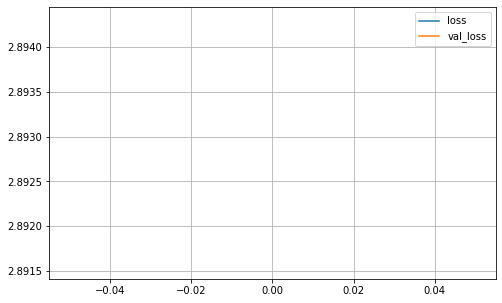

Savign the model
Evaluating on test set
162/162 [==============================] - 0s 2ms/step - loss: nan


In [76]:
train_evaluate_regression(model,'housing_keras_function',"mean_squared_error","sgd",2)

__If we want to send a subset of features by different paths__

in this case we can use multiple inputs

In [77]:
input_A = Input(shape = [5], name = 'wide')
input_B = Input(shape = [6], name = 'deep')
hidden1 = Dense(30, activation = "relu")(input_B)
hidden2 = Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = Dense(1, name ='output')(concat)

In [78]:
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [79]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [80]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [81]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_val))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.6776 - val_loss: 1.1443
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8803 - val_loss: 0.7495
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7028 - val_loss: 0.6557
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6454 - val_loss: 0.6099
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6126 - val_loss: 0.5800
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5885 - val_loss: 0.5555
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5694 - val_loss: 0.5361
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5540 - val_loss: 0.5218
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5412 - val_loss: 0.5091
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5304 - val_loss: 0.4994

In [82]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4841


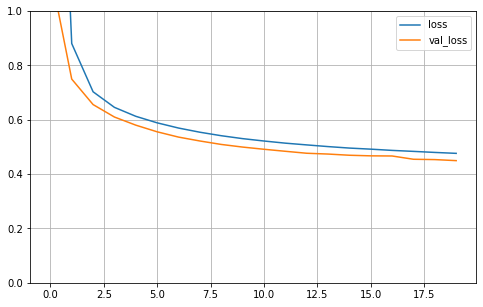

In [83]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [84]:
model.save(''.join(['models/ch_10/','keras_wide_deep','.h5']))

In [85]:
y_pred = model.predict((X_new_A, X_new_B))

In [86]:
y_pred

array([[1.0686252],
       [1.9616485],
       [2.45022  ]], dtype=float32)

We may need multiple outputs in many cases, like:

- the task demands it
- we may have multiple dependent task based on same data
- regularization task

to add extra output we can connect them to the appropiate layers and add them to our model's output. 

In [87]:
##adding to the last model

input_A = Input(shape = [5], name = 'wide')
input_B = Input(shape = [6], name = 'deep')
hidden1 = Dense(30, activation = "relu")(input_B)
hidden2 = Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = Dense(1, name ='main_output')(concat)
aux_output = Dense(1, name ='aux_output')(hidden2)

model = keras.Model(inputs = [input_A,input_B], outputs = [output, aux_output])

Each output will need a loss function. therefore, on compiling we pass a list of losses. if we pass on loss, it will be used for all the outputs. 

In [88]:
model.compile(loss = ["mse","mse"], loss_weights = [0.9,0.1], optimizer = "sgd")

In [89]:
history = model.fit([X_train_A,X_train_B], [y_train, y_train], epochs = 20, validation_data = ([X_valid_A, X_valid_B], [y_val, y_val]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9150 - main_output_loss: 0.7927 - aux_output_loss: 2.0164 - val_loss: 0.7051 - val_main_output_loss: 0.6309 - val_aux_output_loss: 1.3731
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6089 - main_output_loss: 0.5438 - aux_output_loss: 1.1943 - val_loss: 0.6007 - val_main_output_loss: 0.5497 - val_aux_output_loss: 1.0594
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5398 - main_output_loss: 0.4914 - aux_output_loss: 0.9757 - val_loss: 0.4879 - val_main_output_loss: 0.4443 - val_aux_output_loss: 0.8802
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4996 - main_output_loss: 0.4621 - aux_output_loss: 0.8363 - val_loss: 0.4699 - val_main_output_loss: 0.4370 - val_aux_output_loss: 0.7663
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4791 - main_output_loss: 0.4492 - aux_output_loss: 0.7486 - val_loss

In [90]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3789 - main_output_loss: 0.3653 - aux_output_loss: 0.5014


In [91]:
model.save('models/ch_10/2_inputs_2_outputs.h5')

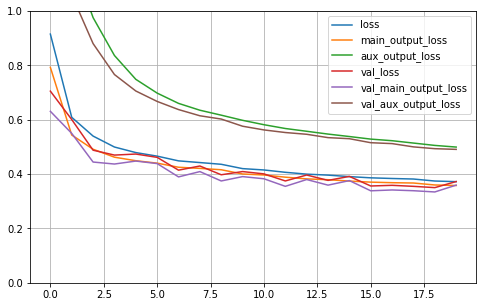

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [93]:
y_pred_main, y_pred_aux = model.predict([X_new_A,X_new_B])

In [94]:
print(y_pred_main,y_pred_aux)

[[0.93198884]
 [1.6489842 ]
 [2.3287416 ]] [[1.5073193]
 [1.7741817]
 [2.432131 ]]


### Using the Sublcassing API to build Dynamic models

sequential API and functional API are decalrative, we define the layers and declare how they should be connected, then we start feedign the model. these can be easily represented in graphs, but they are static. some models involve loops, varying shaped, conditional branching and other dynamic behaviors. in these cases, we can prefer a imperatieve programming style, the subclassing APIs. 

we can subclass the model class and create laters in the contructor and use them in the call() method. 

In [95]:
##subclassing a wide and deep model

class wide_and_deep_model(keras.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs) ##for stangard args
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = wide_and_deep_model()

we can add loops and if esle inside the call function. this model provides extra flexibility but since it's hidden in a class, keras cannot inspect it. we only get the list of layers and not how they are connected. 

keras models can act as a layer and multiple models can be combined together to vreate a new model. 


### Saving and Loading Model and Checkpoints

__Saving model__

`model.save('<model_name>.h5')`

Keras will use the HDF5 format to save both the model’s architecture (including every layer’s hyperparameters) and the values of all the model parameters for every layer (e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters and any state it may have).

__loading the model__

```model = keras.models.load_model("<model_name>.h5")```

This will work when using the Sequential API or the Functional API, but unfortunately not when using model subclassing. You can use save_weights() and load_weights() to at least save and restore the model parameters, but you will need to save and restore
everything else yourself.

__Saving Checkpoints__


for longer training, we can save checkpoints instead of waiting for full training to complete. we can do so by using callbacks.
fit() method accepts callbacks argument that allows us to specify the list of objects that keras will call at the start and end of the training. ex. modelCheckpoint callback saves the checkpoints at regular intervals, by defualt at the end of each epoch.

In [102]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error", optimizer = "sgd")


In [103]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/ch_10/checkpoint_test.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.3333
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4934
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4384
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6614
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4040
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3947
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3928
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3877
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3830
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3786


Moreover, we can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only save our model when its performance on the validation set is the best so far. This way, we do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set.

#### Implementing early stopping

In [107]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/ch_10/early_stopping_test.h5", save_best_only=True)

In [108]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3559 - val_loss: 0.3537
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3556 - val_loss: 0.3470
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3543 - val_loss: 0.3369
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3533 - val_loss: 0.3412
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3515 - val_loss: 0.3417
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3491 - val_loss: 0.3370
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3490 - val_loss: 0.3394
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3470 - val_loss: 0.3413
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3462 - val_loss: 0.3398
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3462 - val_loss: 0.3614

In [109]:
model = keras.models.load_model("models/ch_10/early_stopping_test.h5") # roll back to best model

Another method is to use `EarlyStopping` callback. It interrupts trainign when it measures no progress o nthe validation set for a number of epochs (defined by patience argument), ity will optionally rollback to the best model. we can combine callbacks to save checkpoints of the model.

In [110]:
es_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

#https://keras.io/api/callbacks/early_stopping/
#patience: Number of epochs with no improvement after which training will be stopped.
#restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. 

In [111]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/ch_10/early_stopping_test_cb.h5", save_best_only=True)

In [113]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint_cb, es_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3525 - val_loss: 0.3384
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3510 - val_loss: 0.3488
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3501 - val_loss: 0.3401
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3493 - val_loss: 0.3622
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3473 - val_loss: 0.3436
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3475 - val_loss: 0.3457
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3454 - val_loss: 0.3403
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3452 - val_loss: 0.3418
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3431 - val_loss: 0.3482
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3428 - val_lo

The number of epochs can be set to a large value since training will stop automatically when there is no more progress. In this case, there is no need to restore the best model saved because the EarlyStopping callback will keep track of the best weights and restore them for you at the end of training.

we can write custom callbacks. ex: a callback will display the ratio btw val loss and training loss.

In [114]:
class print_ratio_loss_cb(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

we can similarly implement:

- on_train_begin()
- on_train_end()
- on_epoch_begin()
- on_epoch_end()
- on_batch_begin()
- and on_batch_end()

for evaluations and prediction, we can iumplement:

- on_test_begin()
- on_test_end()
- on_test_batch_begin()
- on_test_batch_end() (called by evaluate())

- on_predict_begin()
- on_predict_end()
- on_predict_batch_begin()
- on_predict_batch_end() (called by predict())\


### Using TensorBoard for Visualization


we can use tensorBoard for viewing learning curces during training, and comparing learning curves btw multiple runs, and analyzing training statistics. it's automatically installed on installing tensorflow. to use it, we need to modify the outputs to special binary log files called _event files_. each binary data record is called a _summary_. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations. 

TensorBoard server to a root log directory and configure your program so that it writes to a different subdirectory every time it runs. This way, the same TensorBoard server instance will allow you to visualize and compare data from multiple runs of your program, without getting everything mixed up.

In [136]:
import os
import time

In [137]:
os.curdir

'.'

In [138]:
root_logdir =  os.path.join(os.curdir, "logs")

In [139]:
time.strftime("run_%Y_%m_%d-%H_%M_%S")

'run_2021_10_14-11_43_04'

In [140]:
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [141]:
run_logdir = get_run_logdir()

In [142]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [143]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val),callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3125 - val_loss: 0.3193
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3129 - val_loss: 0.3176
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3144 - val_loss: 0.3273
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3142 - val_loss: 0.3151
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3139 - val_loss: 0.3600
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3138 - val_loss: 0.3191
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3140 - val_loss: 0.3159
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3130 - val_loss: 0.3182
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3122 - val_loss: 0.3198
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3191 - val_loss: 0.3338

There’s one directory per run, each containing one subdirectory for training logs and one for validation logs. Both contain event files, but the training logs also include profiling traces: this allows TensorBoard to show you exactly how much time the model spent on each part of your model, across all your devices, which is great for locating performance bottlenecks. 

Next we launch tensorboard web interface usign the command:
`tensorboard --logdir=./logs --port=6006`

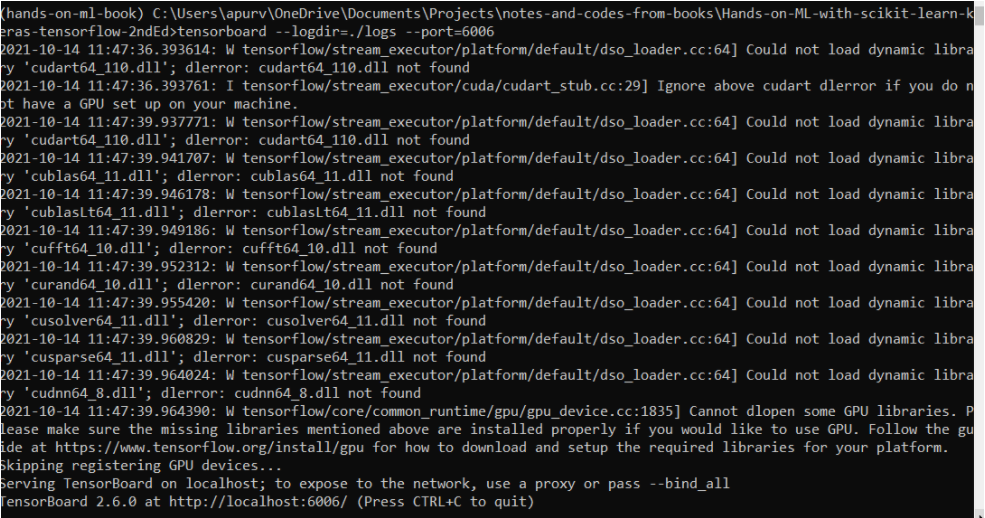

we can also visualize the whole graph, the learned weights (projected to 3D), or the profiling traces. The TensorBoard() callback has options to log extra data too, such as embeddings. Additionally, TensorFlow offers a lower-level API in the tf.summary package. The following code creates a SummaryWriter using the create_file_writer() function, and it uses this writer as a context to log scalars, histograms, images, audio, and text, all of which can then be visualized using TensorBoard

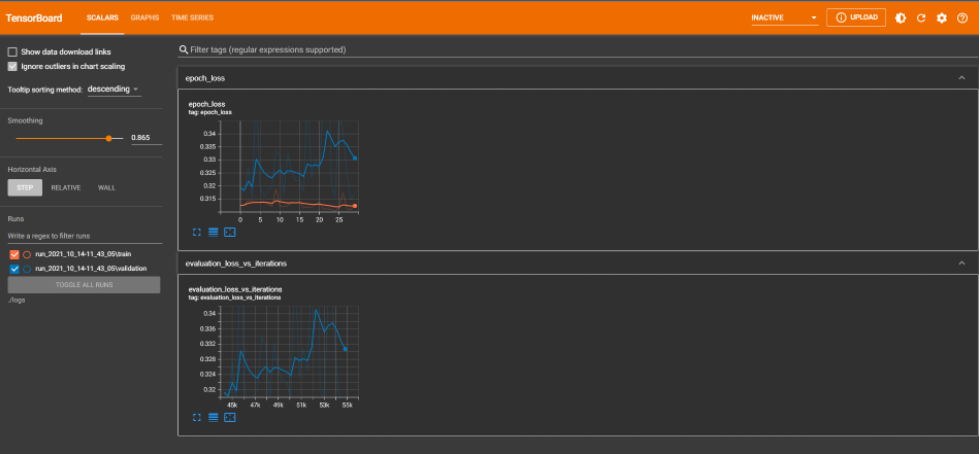

In [144]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)

In [145]:
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

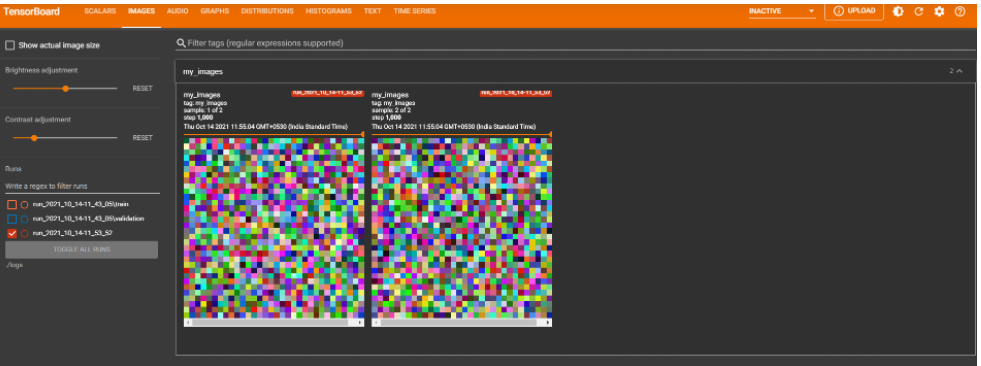

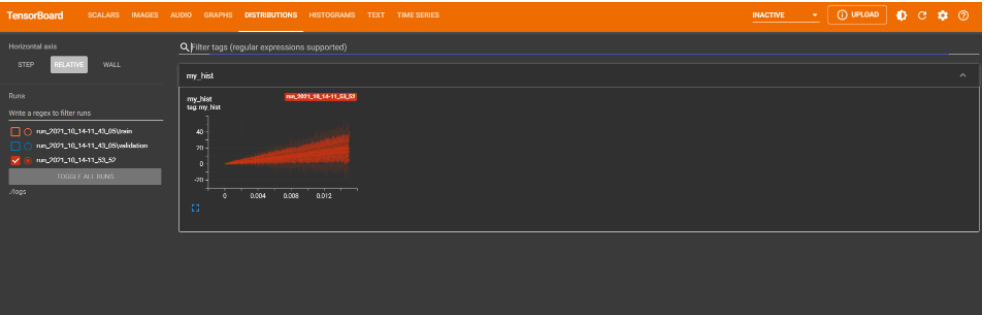

### Fine-Tuning Neural Network Hyperparameters

Since NN have such high flexibility there are many more yperparameters to tune as well, like number of neurons, layers  etc. we can use gridsearch or randomsearch combined with k-fold validation to explore the hyperparamter space. To do this, we
need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [149]:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate  = 3e-3, input_shape = [8]):
    ##Defingin the model as sequential
    model = keras.models.Sequential()
    
    ##adding the input layer
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    
    ##adding n hidden layer
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = "relu"))
        
    ##add output layer
    model.add(keras.layers.Dense(1))
    
    ##defining the optimizer
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = "mse", optimizer = optimizer)
    return model

In [150]:
##create a KerasRegressor based on this build_model() function

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [152]:
es_cb = [keras.callbacks.EarlyStopping(patience=10)]
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=es_cb)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.2890 - val_loss: 0.7705
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7295 - val_loss: 0.6497
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6324 - val_loss: 0.5782
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5707 - val_loss: 0.5344
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5295 - val_loss: 0.4971
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5012 - val_loss: 0.4925
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4816 - val_loss: 0.4698
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4673 - val_loss: 0.4605
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4568 - val_loss: 0.4287
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4493 - val_lo

In [153]:
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

162/162 [==============================] - 0s 1ms/step - loss: 0.3612


In [157]:
keras_reg.save('models/ch_10/keras_reg')

AttributeError: 'KerasRegressor' object has no attribute 'save'

In [154]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [155]:
param_distribs = {
"n_hidden": [0, 1, 2, 3],
"n_neurons": np.arange(1, 100),
"learning_rate": reciprocal(3e-4, 3e-2),
}

In [156]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

In [159]:
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks= es_cb)

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6852 - val_loss: 0.5490
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4253 - val_loss: 1.6904
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4295 - val_loss: 0.7389
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3876 - val_loss: 1.3286
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4558 - val_loss: 0.4906
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3913 - val_loss: 0.4415
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3696 - val_loss: 0.4456
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3638 - val_loss: 0.4014
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3493 - val_loss: 0.3181
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3473 - val_lo

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 0.7007 - val_loss: 0.7536
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4757 - val_loss: 0.4077
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3961 - val_loss: 0.5062
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3983 - val_loss: 0.3751
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3719 - val_loss: 0.3433
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3536 - val_loss: 0.3502
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3464 - val_loss: 0.3339
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3400 - val_loss: 0.3756
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3300 - val_loss: 0.3546
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3323 - val_loss: 0.3503
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 1.0675 - val_loss: 0.5459
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6332 - val_loss: 0.3598
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3786 - val_loss: 0.3385
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3524 - val_loss: 0.3245
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3422 - val_loss: 0.3629
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3370 - val_loss: 0.3251
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3298 - val_loss: 0.3007
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3229 - val_loss: 0.3212
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3264 - val_loss: 0.3040
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3147 - val_loss: 0.3011
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 4.3328 - val_loss: 2.9738
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 2.0530 - val_loss: 2.0379
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3267 - val_loss: 1.6448
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0547 - val_loss: 1.3883
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9261 - val_loss: 1.2000
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8516 - val_loss: 1.0555
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8035 - val_loss: 0.9467
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7700 - val_loss: 0.8672
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7454 - val_loss: 0.8099
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7264 - val_loss: 0.7656
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 3.9039 - val_loss: 3.1119
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 2.1368 - val_loss: 2.0634
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4237 - val_loss: 1.4751
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0911 - val_loss: 1.1351
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9220 - val_loss: 0.9394
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8316 - val_loss: 0.8275
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7799 - val_loss: 0.7620
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7481 - val_loss: 0.7236
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7269 - val_loss: 0.6984
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7109 - val_loss: 0.6809
E

242/242 [==============================] - 1s 2ms/step - loss: 0.4584 - val_loss: 0.4322
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4576 - val_loss: 0.4311
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4568 - val_loss: 0.4304
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4560 - val_loss: 0.4294
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4551 - val_loss: 0.4286
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4543 - val_loss: 0.4277
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4535 - val_loss: 0.4267
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4527 - val_loss: 0.4258
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4520 - val_loss: 0.4253
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4512 - val_loss: 

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 3.3071 - val_loss: 2.5139
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.7598 - val_loss: 1.5656
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1916 - val_loss: 1.1440
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9596 - val_loss: 0.9299
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8559 - val_loss: 0.8257
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8031 - val_loss: 0.7700
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7723 - val_loss: 0.7374
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7510 - val_loss: 0.7143
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7343 - val_loss: 0.6962
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7202 - val_loss: 0.6820
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 1.5372 - val_loss: 1.3169
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7401 - val_loss: 0.6387
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6422 - val_loss: 0.5770
Epoch 4/100
242/242 [==============================] - ETA: 0s - loss: 0.592 - 1s 3ms/step - loss: 0.5920 - val_loss: 0.5354
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5561 - val_loss: 0.5065
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5291 - val_loss: 0.4901
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5083 - val_loss: 0.4712
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4918 - val_loss: 0.4548
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4801 - val_loss: 0.4442
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4

242/242 [==============================] - 1s 2ms/step - loss: 0.3219 - val_loss: 0.3118
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3210 - val_loss: 0.3146
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3205 - val_loss: 0.3121
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3199 - val_loss: 0.3106
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3196 - val_loss: 0.3179
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3191 - val_loss: 0.3127
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3187 - val_loss: 0.3309
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3193 - val_loss: 0.3360
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3193 - val_loss: 0.3555
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3203 - val_loss: 

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 2s 3ms/step - loss: 1.4970 - val_loss: 0.9352
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7160 - val_loss: 0.6291
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6215 - val_loss: 0.5718
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5713 - val_loss: 0.5327
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5326 - val_loss: 0.4961
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5047 - val_loss: 0.4703
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4837 - val_loss: 0.4502
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4671 - val_loss: 0.4368
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4545 - val_loss: 0.4256
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4441 - val_loss: 0.4161
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 1.3380 - val_loss: 0.7319
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6967 - val_loss: 0.6268
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6296 - val_loss: 0.5806
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5849 - val_loss: 0.5434
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5505 - val_loss: 0.5209
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5223 - val_loss: 0.4881
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5023 - val_loss: 0.4675
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4818 - val_loss: 0.4689
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4677 - val_loss: 0.4455
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4570 - val_loss: 0.4301
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 0.9284 - val_loss: 0.6903
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5722 - val_loss: 0.7625
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4965 - val_loss: 0.4582
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4542 - val_loss: 0.4101
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4256 - val_loss: 0.3904
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4098 - val_loss: 0.3999
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3969 - val_loss: 0.3829
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3857 - val_loss: 0.3723
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3777 - val_loss: 0.3732
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3707 - val_loss: 0.3587
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 0.9178 - val_loss: 0.5579
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4924 - val_loss: 0.4826
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4340 - val_loss: 0.4708
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4136 - val_loss: 0.4330
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.4782
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4021 - val_loss: 0.4875
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3905 - val_loss: 0.4644
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3804 - val_loss: 0.3626
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3716 - val_loss: 0.3606
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3655 - val_loss: 0.3470
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 0.9053 - val_loss: 0.7524
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5484 - val_loss: 0.4385
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4472 - val_loss: 0.4148
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4239 - val_loss: 0.3900
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4065 - val_loss: 0.3965
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3969 - val_loss: 0.3851
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3868 - val_loss: 0.3717
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3857 - val_loss: 0.3839
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3747 - val_loss: 0.3576
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3694 - val_loss: 0.3587
E

242/242 [==============================] - 1s 2ms/step - loss: 0.2775 - val_loss: 0.3020
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2753 - val_loss: 0.2997
Epoch 83/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2768 - val_loss: 0.3133
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2760 - val_loss: 0.3125
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2743 - val_loss: 0.3034
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2731 - val_loss: 0.2992
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2727 - val_loss: 0.3058
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2780 - val_loss: 0.3047
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2731 - val_loss: 0.2946
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2758 - val_loss: 

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 1.5249 - val_loss: 7.0418
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0050 - val_loss: 9.8556
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3962 - val_loss: 17.2342
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 1.8713 - val_loss: 27.8784
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 3.2731 - val_loss: 46.9676
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 4.1007 - val_loss: 74.1751
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 5.9003 - val_loss: 132.4300
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 12.4028 - val_loss: 221.0929
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 15.4421 - val_loss: 379.1924
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 23.2517 - val_l

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 1.2870 - val_loss: 0.5671
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5549 - val_loss: 0.5621
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5545 - val_loss: 0.7655
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5402 - val_loss: 0.6765
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5489 - val_loss: 0.6269
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5365 - val_loss: 0.5915
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5394 - val_loss: 1.3023
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5504 - val_loss: 0.9009
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6595 - val_loss: 0.8492
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5326 - val_loss: 0.8471
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 1.8574 - val_loss: 2.8715
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4067 - val_loss: 6.7560
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 3.9890 - val_loss: 15.3541
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.5295 - val_loss: 28.7897
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 22.6933 - val_loss: 78.3013
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 14.5784 - val_loss: 219.2824
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 32.0313 - val_loss: 578.9907
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 85.7629 - val_loss: 1621.3186
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 287.4104 - val_loss: 4518.4395
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 2393.629

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 3.3440 - val_loss: 2.3476
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.5689 - val_loss: 1.6719
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1022 - val_loss: 1.2344
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8964 - val_loss: 0.9671
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7869 - val_loss: 0.8165
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7274 - val_loss: 0.7365
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6937 - val_loss: 0.6843
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6729 - val_loss: 0.6554
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6580 - val_loss: 0.6363
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6462 - val_loss: 0.6197
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 3.8199 - val_loss: 2.7412
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.7817 - val_loss: 1.9734
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2196 - val_loss: 1.4467
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9715 - val_loss: 1.0689
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8311 - val_loss: 0.8450
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7515 - val_loss: 0.7354
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7056 - val_loss: 0.6772
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6778 - val_loss: 0.6476
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6595 - val_loss: 0.6298
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6457 - val_lo

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 3.5179 - val_loss: 2.8874
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.8196 - val_loss: 1.8828
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2307 - val_loss: 1.3041
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9840 - val_loss: 1.0108
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8654 - val_loss: 0.8628
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8039 - val_loss: 0.7824
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7678 - val_loss: 0.7372
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7433 - val_loss: 0.7094
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7246 - val_loss: 0.6895
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7086 - val_loss: 0.6736
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 1.0694 - val_loss: 0.6509
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6342 - val_loss: 0.5473
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5440 - val_loss: 0.4791
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4384
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4471 - val_loss: 0.4121
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4221 - val_loss: 0.4082
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4033 - val_loss: 0.3807
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3902 - val_loss: 0.3724
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3787 - val_loss: 0.3761
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3695 - val_loss: 0.3567
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 2s 3ms/step - loss: 1.3107 - val_loss: 0.6259
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5738 - val_loss: 0.5083
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4977 - val_loss: 0.4800
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4556 - val_loss: 0.4294
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4299 - val_loss: 0.4280
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4136 - val_loss: 0.4085
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4011 - val_loss: 0.3846
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3902 - val_loss: 0.3709
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3809 - val_loss: 0.3683
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3738 - val_loss: 0.3571
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 1.0931 - val_loss: 0.6641
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5860 - val_loss: 0.5040
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4998 - val_loss: 0.4569
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4583 - val_loss: 0.4204
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4319 - val_loss: 0.3961
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4129 - val_loss: 0.4039
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3987 - val_loss: 0.3672
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3919 - val_loss: 0.3753
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3804 - val_loss: 0.3702
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3776 - val_loss: 0.3822
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 2.2240 - val_loss: 0.9686
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8219 - val_loss: 0.7817
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7543 - val_loss: 0.7327
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7281 - val_loss: 0.7059
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7073 - val_loss: 0.6935
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6887 - val_loss: 0.6827
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6743 - val_loss: 0.6639
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6602 - val_loss: 0.6468
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6475 - val_loss: 0.6370
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6365 - val_loss: 0.6241
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 2.2865 - val_loss: 0.8397
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8019 - val_loss: 0.7171
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7172 - val_loss: 0.7037
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6790 - val_loss: 0.6396
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6461 - val_loss: 0.6136
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6240 - val_loss: 0.5901
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6063 - val_loss: 0.5765
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5930 - val_loss: 0.5615
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5821 - val_loss: 0.5517
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5730 - val_loss: 0.5446
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 3.7880 - val_loss: 1.6429
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0904 - val_loss: 0.8308
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7365 - val_loss: 0.6754
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6739 - val_loss: 0.6386
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6535 - val_loss: 0.6186
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6387 - val_loss: 0.6033
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6258 - val_loss: 0.5894
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6135 - val_loss: 0.5764
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6023 - val_loss: 0.5645
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5917 - val_loss: 0.5531
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 2.8538 - val_loss: 2.6957
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1815 - val_loss: 1.5575
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8613 - val_loss: 1.0925
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7626 - val_loss: 0.9040
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7176 - val_loss: 0.7626
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6872 - val_loss: 0.6872
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6634 - val_loss: 0.6372
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6431 - val_loss: 0.6074
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6256 - val_loss: 0.5815
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6103 - val_loss: 0.5649
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 3.1708 - val_loss: 1.8201
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1618 - val_loss: 1.1173
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8239 - val_loss: 0.8172
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7145 - val_loss: 0.7058
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6723 - val_loss: 0.6605
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6491 - val_loss: 0.6347
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6315 - val_loss: 0.6132
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6166 - val_loss: 0.5948
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6026 - val_loss: 0.5795
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5898 - val_loss: 0.5662
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 2.9646 - val_loss: 1.5097
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0540 - val_loss: 0.8982
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7570 - val_loss: 0.6910
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6627 - val_loss: 0.6251
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6263 - val_loss: 0.5952
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6054 - val_loss: 0.5759
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5907 - val_loss: 0.5604
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5777 - val_loss: 0.5483
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5666 - val_loss: 0.5369
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5564 - val_loss: 0.5270
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 0.6420 - val_loss: 0.8136
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4766 - val_loss: 1.1030
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4782 - val_loss: 6.0610
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9435 - val_loss: 0.5082
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3971 - val_loss: 0.3493
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3706 - val_loss: 0.4227
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3597 - val_loss: 0.3669
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3593 - val_loss: 0.3203
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3387 - val_loss: 0.3267
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3352 - val_loss: 0.4416
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 0.6673 - val_loss: 12.4634
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0767 - val_loss: 6.6845
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5994 - val_loss: 0.3950
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3668 - val_loss: 0.3374
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3570 - val_loss: 4.7910
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
242/242 [========

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 0.8811 - val_loss: 0.4503
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6350 - val_loss: 0.5134
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3969 - val_loss: 0.3630
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3658 - val_loss: 0.4546
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3576 - val_loss: 0.3318
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3419 - val_loss: 0.3281
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3345 - val_loss: 0.3206
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3285 - val_loss: 0.3146
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3204 - val_loss: 0.3290
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3132 - val_loss: 0.3118
E

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [  -0.30071121   -0.45712001   -0.34313457   -0.3154326  -168.77205098
   -0.42053726   -0.3153824    -0.42565107   -0.37239394           nan]
  warnings.warn(


Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.0511 - val_loss: 0.4144
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
363/363 [=====================

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001DAD0F7EE50>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DAD1174430>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [160]:
rnd_search_cv.best_params_

{'learning_rate': 0.023543249211569243, 'n_hidden': 3, 'n_neurons': 66}

In [165]:
rnd_search_cv.best_score_

-0.3007112145423889

In [162]:
model = rnd_search_cv.best_estimator_.model

In [163]:
model.save('models/ch_10/rndmcv_best_model.h5')

Python libraries we can use to optimize hyperparameters:

- __Hyperopt__ 
    - A popular library for optimizing over all sorts of complex search spaces (including real values, such as the learning rate, and discrete values, such as the number of layers).

- __Hyperas, kopt, or Talos__
    - Useful libraries for optimizing hyperparameters for Keras models (the first two are based on Hyperopt).

- __Keras Tuner__
    - An easy-to-use hyperparameter optimization library by Google for Keras models, with a hosted service for visualization and analysis.

- __Scikit-Optimize (skopt)__
    -A general-purpose optimization library. The BayesSearchCV class performs Bayesian optimization using an interface similar to GridSearchCV.

- __Spearmint__
    -  A Bayesian optimization library.

- __Hyperband__
    - A fast hyperparameter tuning library based on the recent Hyperband paper by Lisha Li et al.

- __Sklearn-Deap__
    - A hyperparameter optimization library based on evolutionary algorithms, with a GridSearchCV-like interface.

#### Number of Hidden Layers

An MLP with just one hidden layer can theoretically model even the most complex functions, provided it has enough neurons. But for complex problems, deep networks have a much higher parameter efficiency than shallow ones: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data. 

NN take advantage to clubbing the output of the previous hidden layers to build upon the task. Similarly we can use the models in other problems to build upon those, this is called transfer learning. 

for deciding on the number of hidden layers, we can start with one or two hidden layers and keep adding hidden layers until it starts to overfit. 


#### Number of neurons per Hidden Layers\

the number of neurons in the input and output layer is dictated by the nature of the task and output requirements. for the hidden layers, it's common to size them to make a pyramid, with lesser neurons in each layer. However, this practice has been largely abandoned because it seems that using the same number of neurons in all hidden layers performs just as well in most cases, or even better; plus, there is only one hyperparameter to tune, instead of one per layer. That said, depending on the dataset, it can sometimes help to make the first hidden layer bigger than the others.

in genreal, it's mor eefficient to increase te number of layers than increaseing numbr of neurons per layer. 


#### Learning Rate

LR is one of the most important hyperparamter. The optimal learning rate is aout half of the maximum learning rate. One way to find a good learning rate is to train the model for few iteration starting with a low lr and gradually increasing it to large value/. the loss would drop in between ranges.


#### Optmizer

Choosing a better optimizer than plain old Mini-batch Gradient Descent (and tuning its hyperparameters) is also quite important. we can use advance optimizers and test the loss.


#### Batch Size

batch size should based on the hardware limitations, if powerful GPU is avaialbe, batch size can be large.  There’s a catch, though: in practice, large batch sizes often lead to training instabilities, especially at the beginning of training, and the resulting model may not generalize as well as a model trained with a small batch size. 


#### Activation Function

in general, the ReLU activation function will be a good default for all hidden layers. For the output layer, it really depends on your task


#### Number of Iteration

In most cases, the number of training iterations does not actually need to
be tweaked: just use early stopping instead.


### Exercises

__1. The TensorFlow Playground is a handy neural network simulator built by the TensorFlow team. In this exercise, you will train several binary classifiers in just a few clicks, and tweak the model’s architecture and its hyperparameters to gain some intuition on how neural networks work and what their hyperparameters do. Take some time to explore the following:__

__a. The patterns learned by a neural net. Try training the default neural network by clicking the Run button (top left). Notice how it quickly finds a good solution for the classification task. The neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple 27 28 patterns of the first hidden layer into more complex patterns. In general, the more layers there are, the more complex the patterns can be.__

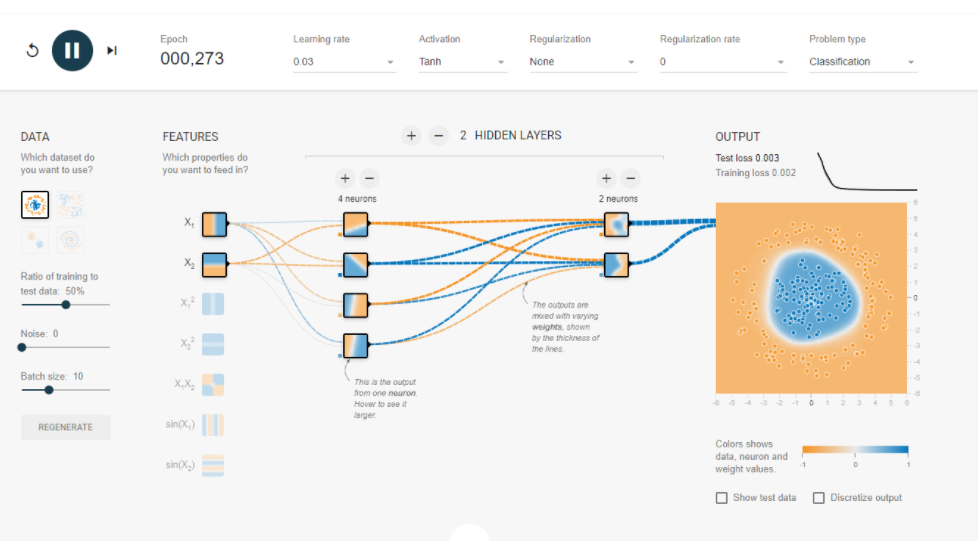

__b. Activation functions. Try replacing the tanh activation function with a ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.__

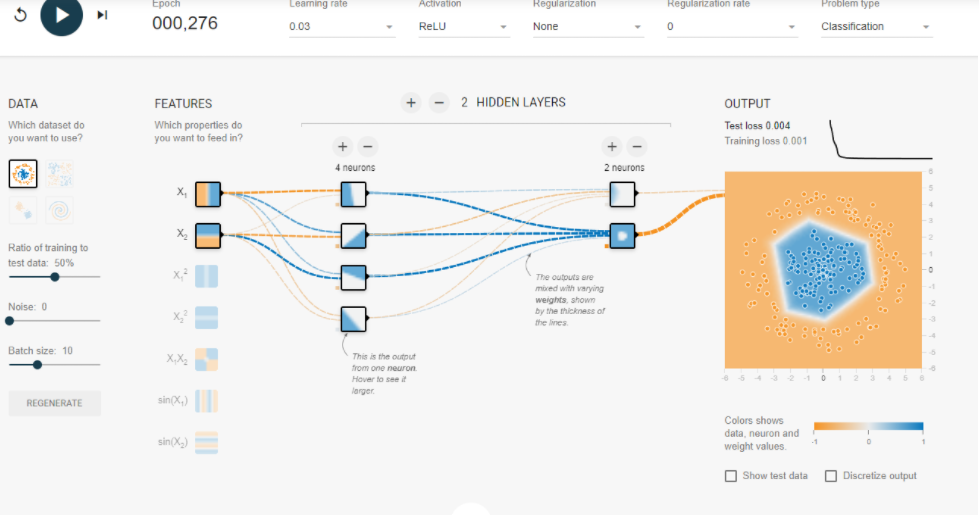

__c. The risk of local minima. Modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, click the Reset button next to the Play button). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum.__

Stuck on local minima
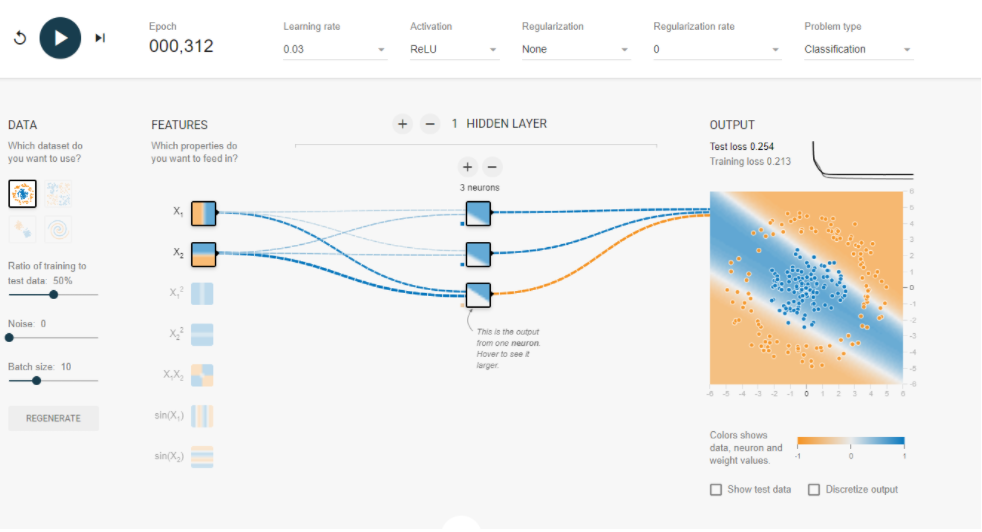

__d. What happens when neural nets are too small. Remove one neuron to keep just two. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and systematically underfits the training set.__

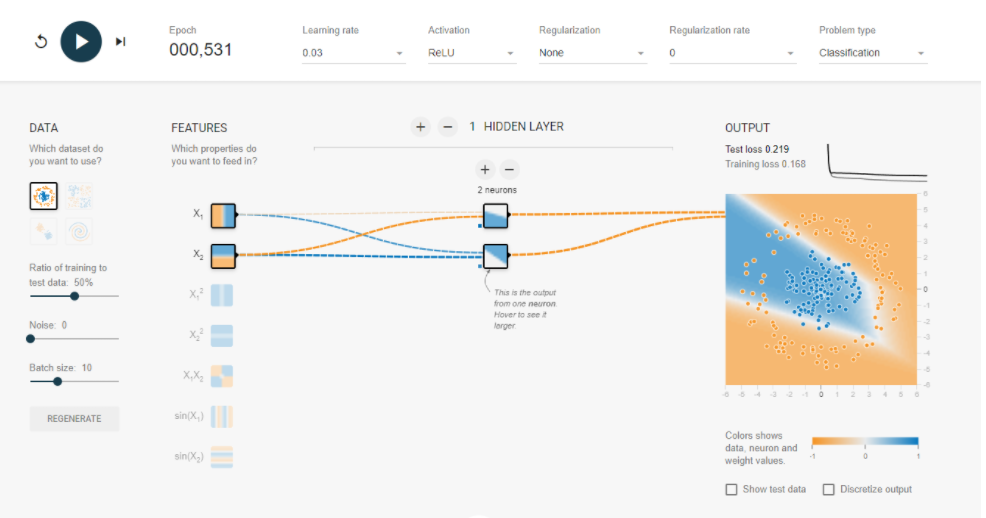

__e. What happens when neural nets are large enough. Set the number of neurons to eight, and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck in local minima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.__

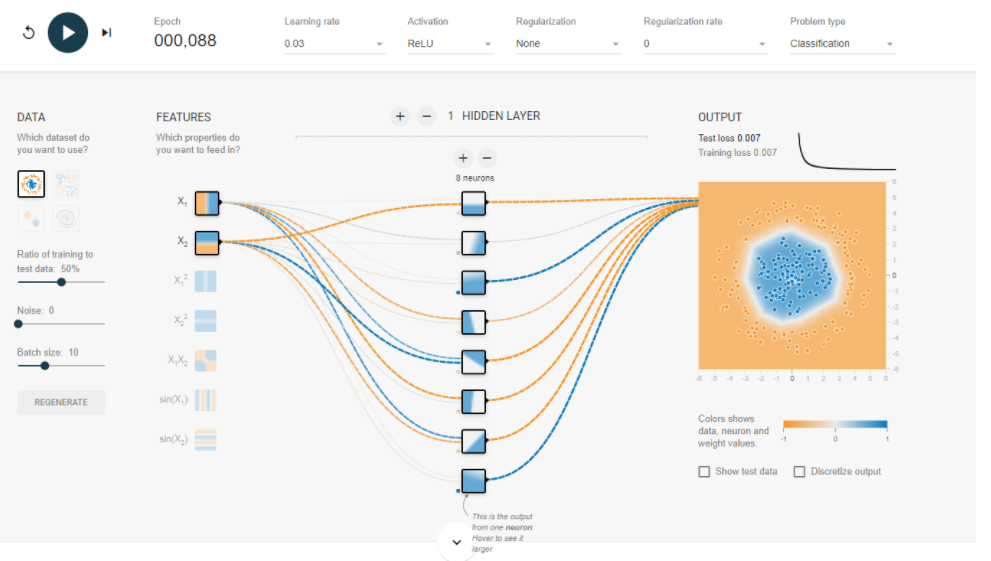

__f. The risk of vanishing gradients in deep networks. Select the spiral dataset (the bottom-right dataset under “DATA”), and change the network architecture to have four hidden layers with eight neurons each. Notice that training takes much longer and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (on the right) tend to evolve faster than the neurons in the lowest layers (on the left). This problem, called the “vanishing gradients” problem, can be alleviated with better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or Batch Normalization (discussed in Chapter 11).__

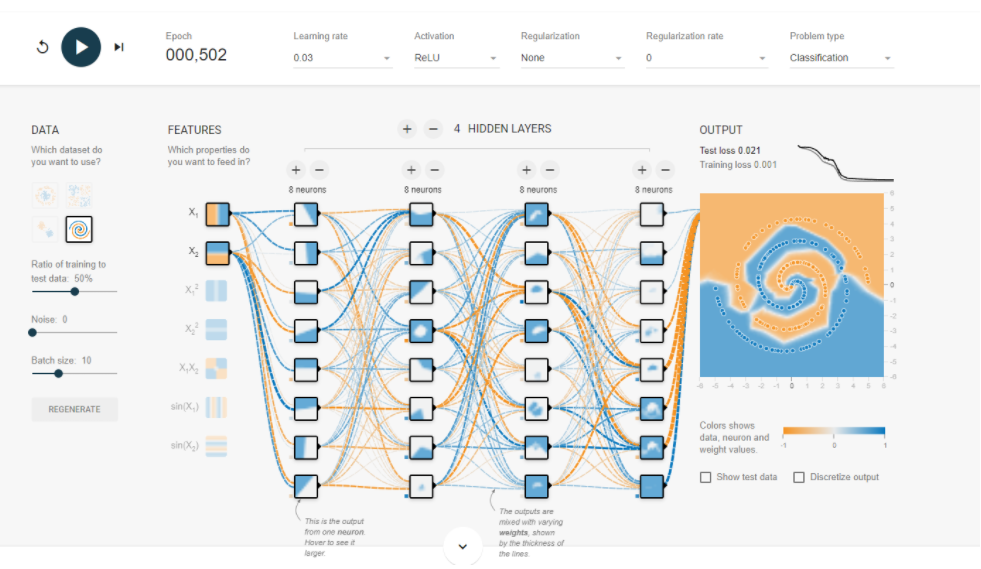

__g. Go further. Take an hour or so to play around with other parameters and get a feel for what they do, to build an intuitive understanding about neural networks.__

__2. Draw an ANN using the original artificial neurons (like the ones in Figure 10-3) that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A ∧ ¬ B ∨ (¬ A ∧ B).__

A ⊕ B = (A ∧ ¬ B ∨ (¬ A ∧ B)

A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B)

A ⊕ B = (C ∨ D) WITH C = (A ∧ ¬ B) AND D = (¬ A ∧ B)

__3. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?__

classic perceptron will work better if we have linearly separable datya,with is not always the case. Logreg classifier will work even if the data is not linearly separable. 

to make a perceptron equivalent to logred classifier, we can change the activation function to sigmoid and loss function to sgd. 

__4. Why was the logistic activation function a key ingredient in training the first MLPs?__

the simple perceptron has derivative as 0, hence gradient descent wouldn't work. Using sigmoid function, it allowed the gd to move. 

__5. Name three popular activation functions. Can you draw them?__

- ReLU: max(0,x) 
- tanh: tanh(x0
- Sigmoid: $\frac 1 {(1+e^{-x})}$

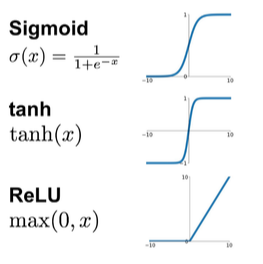

__6. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.__

__a. What is the shape of the input matrix X?__

m\*10, where m is the batch size 

__b. What are the shapes of the hidden layer’s weight vector $W_h$ and its bias vector $b_h$?__

- weight vector: 50\*10
- bias vector: 50

__c. What are the shapes of the output layer’s weight vector $W_o$ and its bias vector $b_o$ ?__

- weight vector: 3\*50
- bias vector: 3

__d. What is the shape of the network’s output matrix Y?__

m\*3, where m is the batch size 

__e. Write the equation that computes the network’s output matrix Y as a function of $X, W_h , b_h , W_o , b_o$.__

- input: $X$
- input for hidden layer: $X*W_h + b_h$
- output from hidden layer: $ReLU(X*W_h + b_h$)
- input for output layer: $ReLU(X*W_h + b_h)*W_o + b_o$
- output from output layer: $ReLU(ReLU(X*W_h + b_h)*W_o + b_o$)

__7. Multiple ques:__

__a. How many neurons do you need in the output layer if you want to classify email into spam or ham?__

since it's only one label, we need one neuron in the output layer, it can output 1 for spam and 0 for ham

__b. What activation function should you use in the output layer?__

Sigmoid can work since we need the probabilities of the output being 1.

__c. If instead you want to tackle MNIST, how many neurons do you need in the output layer, and which activation function should you use? What about for getting your network to predict housing prices, as in Chapter 2?__

For MNIST, since there are 10 labels, we need 10 neuron and softmax activations fucntion. each neuron for the proability for that  particular label. all the output will sum to 1. 

For predicting housing price, we need one neuron and no activation function. to let it be able to output any range of values.

__8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?__



__9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?__

we can tweak number of hidden layer, number of neurons in these layers, learning rate, batch size, activation function and loss function etc.

If we observe overfitting, we should simplify the model by reducting the number of hidden layers and number of neurons in the hidden layers.

__10. Step wise__

__a. Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data().__

__b. See if you can get over 98% precision.__


__c. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the error, and finding the point where the error shoots up).__

__d. Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard__

In [14]:
##Loading the libraries
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Concatenate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import precision_score , recall_score, accuracy_score
from sklearn.model_selection import train_test_split

In [15]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [16]:
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [17]:
##Creating validation set
X_train, X_val = X_train[5000:],X_train[:5000]
y_train, y_val = y_train[5000:],y_train[:5000]

In [18]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0